In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/project_3

/content/drive/MyDrive/project_3


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_3/movie_tvshow_description.csv")
image=np.array(Image.open("/content/drive/MyDrive/project_3/twitter.png"))

In [ ]:
df.head()

,url,description,genres,title
0,https://www.metacritic.com/movie/the-informer/,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"['Action', 'Crime', 'Drama', 'Thriller', '', '', '', '', 'Action', 'Crime', 'Drama', 'Thriller']","7,921. The Informer\nNOV 6, 2020  \nHonorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The General, the most powerful crime boss in New York. But when the FBI sting meant to finally earn Koslow his freedom results in the death of an undercover NYPD cop, Koslow finds himself caught in the crossfire between the mob ..."
1,https://www.metacritic.com/movie/reign-over-me/,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...","['Drama', '', 'Drama']","7,922.\nMAR 23, 2007\nFormer college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his beautiful wife, children and career is overwhelmed by his responsibilities. Their rekindled relationship becomes a lifeline for the two men, who are both in need of a trusted friend at this pivotal moment in their lives. (Columbia Pictur..."
2,https://www.metacritic.com/movie/triple-frontier/,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","['Action', 'Thriller', '', '', 'Action', 'Thriller']","7,923.\nMAR 6, 2019  \nA group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But when events take an unexpected turn and threaten to spiral out of control, their skills, their loyalties and their morals are pushed to a breaking point in an epic battle for survival.\n61"
3,https://www.metacritic.com/movie/somewhere-in-queens/,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","['Comedy', 'Drama', 'Sport', '', '', '', 'Comedy', 'Drama', 'Sport']","7,924.\nAPR 21, 2023  \nLeo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son Sticks (Jacob Ward), and Leos close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and younger brother 

In [ ]:
df["genres"] = df["genres"].apply(lambda x: [genre.strip() for genre in ast.literal_eval(x) if genre.strip()])
# This removes empty strings from each list in the "genres" column

In [ ]:
df['genres'] = df['genres'].apply(lambda x: list(set(x)))

In [ ]:
df.shape

(21869, 4)

In [ ]:
df.isnull().sum()

url            0
description    0
genres         0
title          0
dtype: int64

In [ ]:
df.drop(columns=["url","title"],axis=1,inplace=True)

In [ ]:
df.head()

,description,genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Crime, Thriller, Action, Drama]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Thriller, Action]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Drama, Sport, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Biography, Crime, Drama, Documentary, Mystery]"


In [ ]:
df["genres"].value_counts()

[Drama]                                   1728
[Documentary]                             1286
[Comedy]                                  1144
[Drama, Comedy]                            926
[Drama, Romance, Comedy]                   720
                                          ... 
[Documentary, Biography, Mystery, War]       1
[Documentary, Western, History]              1
[Fantasy, Family, Romance, Animation]        1
[Documentary, Romance, War]                  1
[Crime, Adventure, Action, Drama]            1
Name: genres, Length: 2250, dtype: int64

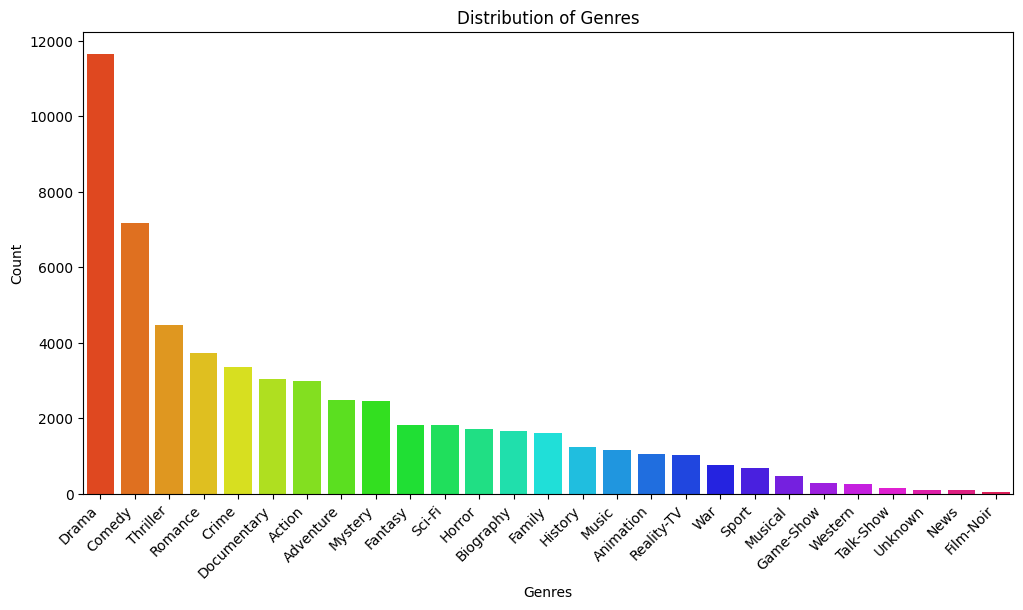

In [ ]:
genre_count = [g for gen in df["genres"] for g in gen]
genre_series = pd.Series(genre_count)
genre_counts = genre_series.value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(x=genre_series, order=genre_counts.index, palette="hsv")
plt.xticks(rotation=45, ha="right")  #
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Distribution of Genres")
plt.show()

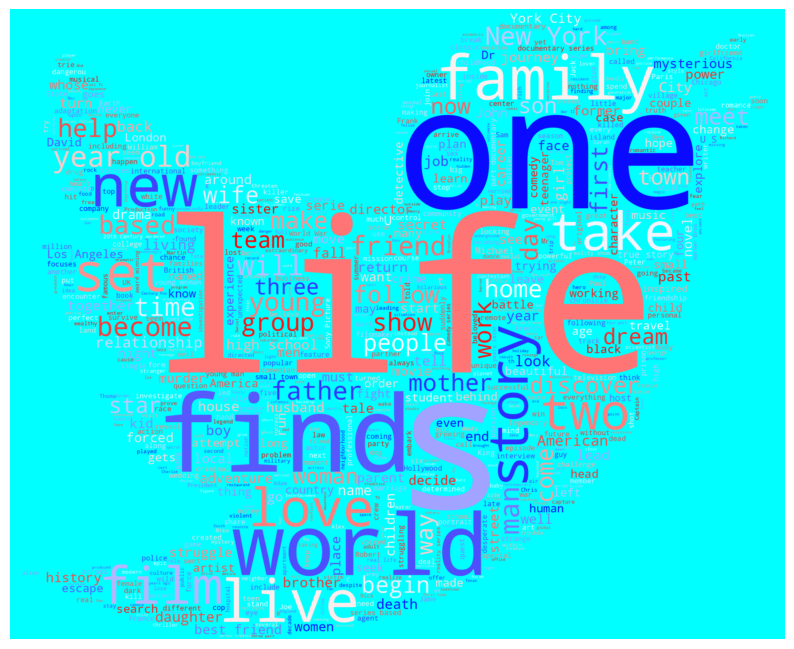

In [ ]:
plt.figure(figsize=(10,10))
all_text=" ".join(df['description'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='aqua', max_words=800,colormap="bwr",mask=image).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1000x1000 with 0 Axes>

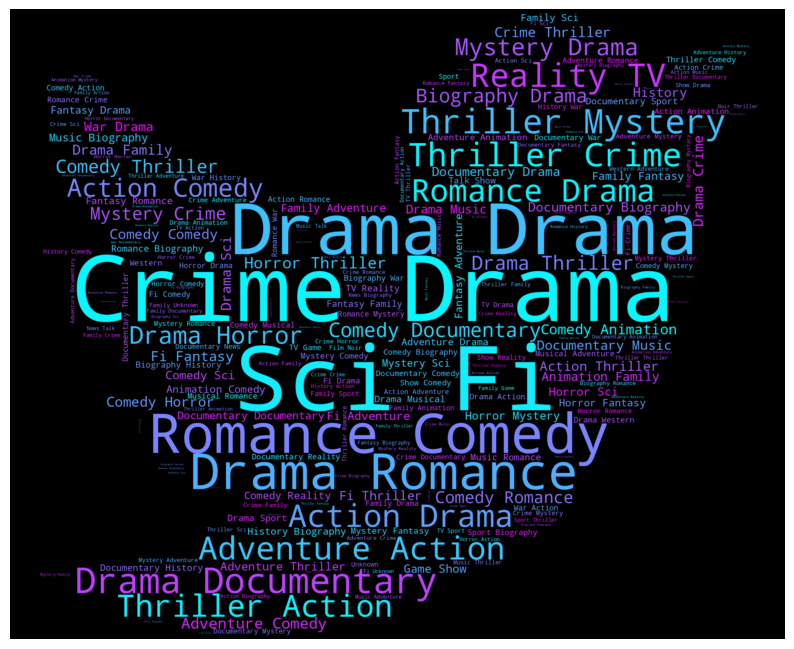

In [ ]:
plt.figure(figsize=(10,10))
df["new_genres"] = df["genres"].apply(lambda x: ' '.join([genre.strip() for genre in x if genre.strip()]))
all_text = " ".join(df['new_genres'].values.tolist())
wordcloud = WordCloud(width=800, height=800, stopwords=STOPWORDS,mask=image, background_color='black', max_words=800, colormap="cool").generate(all_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


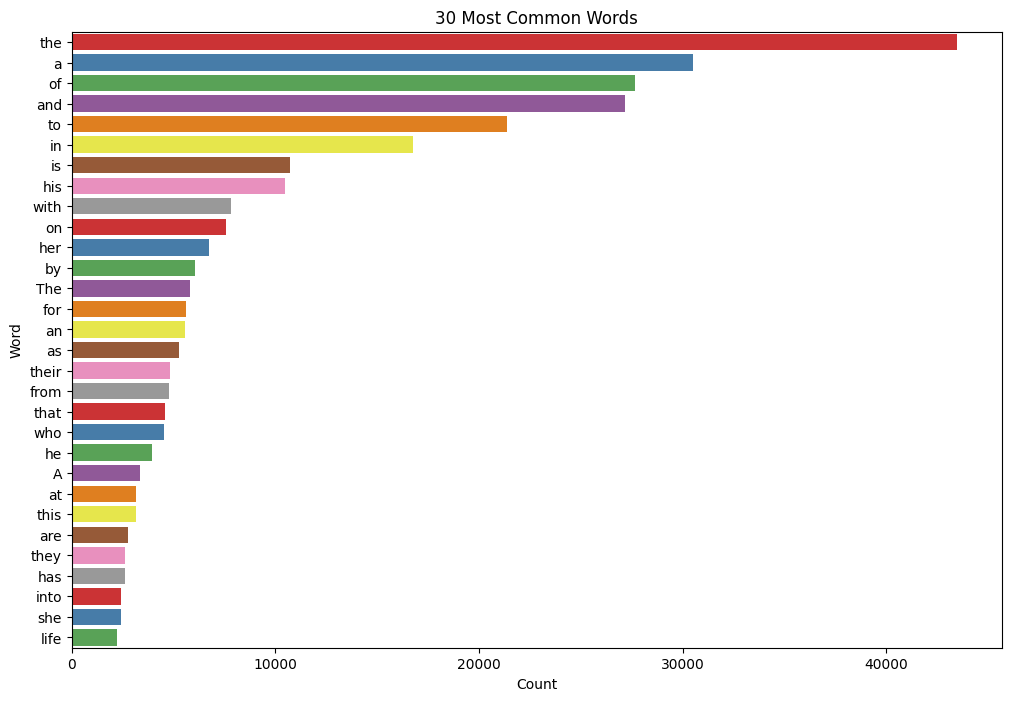

In [ ]:
from collections import Counter
data_set = df["description"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
df.drop(columns=["new_genres"],axis=1,inplace=True)

In [ ]:
df.head()

,description,genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Crime, Thriller, Action, Drama]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Thriller, Action]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Drama, Sport, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Biography, Crime, Drama, Documentary, Mystery]"


In [ ]:
type(df["genres"])

pandas.core.series.Series

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 27
{'Crime': 3370, 'Thriller': 4462, 'Action': 2987, 'Drama': 11649, 'Sport': 687, 'Comedy': 7180, 'Biography': 1661, 'Documentary': 3044, 'Mystery': 2469, 'Sci-Fi': 1818, 'Romance': 3737, 'Western': 275, 'Horror': 1721, 'Fantasy': 1838, 'Family': 1602, 'Adventure': 2479, 'Animation': 1071, 'Film-Noir': 40, 'History': 1241, 'War': 758, 'Musical': 484, 'Music': 1169, 'News': 102, 'Unknown': 106, 'Talk-Show': 162, 'Reality-TV': 1024, 'Game-Show': 297}


In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
print("Length of rare genres :",len(rare_genres))
print(f"Rare genres are : {rare_genres}")

Length of rare genres : 4
Rare genres are : ['Film-Noir', 'News', 'Unknown', 'Talk-Show']


In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = genres
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(21753, 2)

In [ ]:
df['revised_genres'] = revised_genre_list
df.head()

,description,genres,revised_genres
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Crime, Thriller, Action, Drama]","[Crime, Thriller, Action, Drama]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama],[Drama]
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Thriller, Action]","[Thriller, Action]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Drama, Sport, Comedy]","[Drama, Sport, Comedy]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Biography, Crime, Drama, Documentary, Mystery]","[Biography, Crime, Drama, Documentary, Mystery]"


In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 23
{'Crime': 3370, 'Thriller': 4462, 'Action': 2987, 'Drama': 11649, 'Sport': 687, 'Comedy': 7180, 'Biography': 1661, 'Documentary': 3044, 'Mystery': 2469, 'Sci-Fi': 1818, 'Romance': 3737, 'Western': 275, 'Horror': 1721, 'Fantasy': 1838, 'Family': 1602, 'Adventure': 2479, 'Animation': 1071, 'History': 1241, 'War': 758, 'Musical': 484, 'Music': 1169, 'Reality-TV': 1024, 'Game-Show': 297}


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
encode_genre_types

{'Crime': 0,
 'Thriller': 1,
 'Action': 2,
 'Drama': 3,
 'Sport': 4,
 'Comedy': 5,
 'Biography': 6,
 'Documentary': 7,
 'Mystery': 8,
 'Sci-Fi': 9,
 'Romance': 10,
 'Western': 11,
 'Horror': 12,
 'Fantasy': 13,
 'Family': 14,
 'Adventure': 15,
 'Animation': 16,
 'History': 17,
 'War': 18,
 'Musical': 19,
 'Music': 20,
 'Reality-TV': 21,
 'Game-Show': 22}

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[10][: 30]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,description,genres,revised_genres,genre_cat_list
0,Honorably discharged Special Ops soldier Pete Koslow's (Joel Kinnaman) world is turned upside-down when he is jailed after a fight to protect his wife (Ana de Armas). He's given a chance for early release by becoming an informant for the FBI (Rosamund Pike and Clive Owen) and using his covert skills in an operation to take down The Gener...,"[Crime, Thriller, Action, Drama]","[Crime, Thriller, Action, Drama]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"Former college roommates Charlie Fineman (Sandler) and Alan Johnson (Cheadle) meet up again by chance on a Manhattan street corner. Five years after losing his family on 9/11, Charlie has retreated from his life, and Alan is stunned to see the changes in his formerly gregarious friend. At the same time, Alan who should be enjoying his be...",[Drama],[Drama],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"A group of former Special Forces operatives (Ben Affleck, Oscar Isaac, Charlie Hunnam, Garrett Hedlund and Pedro Pascal) reunite to plan a heist in a sparsely populated multi-border zone of South America. For the first time in their prestigious careers these unsung heroes undertake this dangerous mission for self instead of country. But ...","[Thriller, Action]","[Thriller, Action]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"Leo Russo (Ray Romano) lives a simple life in Queens, New York with his wife Angela (Laurie Metcalf), their shy but talented son “Sticks” (Jacob Ward), and Leo’s close-knit network of Italian-American relatives and neighborhood friends. Happy enough working at the family construction business alongside his father (Tony Lo Bianco) and you...","[Drama, Sport, Comedy]","[Drama, Sport, Comedy]","[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"In the summer of 1991 Jeffrey Dahmer was arrested in Milwaukee and sentenced to 957 years in prison for killing 17 people and dismembering their bodies. Through the use of archival footage and interviews with the local medical examiner, police detective, and Dahmer's neighbors, this documentary explores the ordinary man behind the horri...","[Biography, Crime, Drama, Documentary, Mystery]","[Biography, Crime, Drama, Documentary, Mystery]","[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# DataLoaders__And__Modeling

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "roberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/multilabel_movie_tvshow.pkl")

In [ ]:
dls = torch.load("dataloaders/multilabel_movie_tvshow.pkl")

In [ ]:
dls.vocab

['Crime', 'Thriller', 'Action', 'Drama', 'Sport', 'Comedy', 'Biography', 'Documentary', 'Mystery', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Fantasy', 'Family', 'Adventure', 'Animation', 'History', 'War', 'Musical', 'Music', 'Reality-TV', 'Game-Show']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Four young men from the wrong side of the tracks in New Jersey come together to form the iconic rock group The Four Seasons. The story of their trials and triumphs are accompanied by the songs they made famous, including “Sherry,” “Big Girls Don’t Cry,” “Walk Like a Man,” “Dawn,” “Rag Doll,” “Bye Bye Baby,” “Who Loves You,” and many more...","[Drama, Biography, Music]"
1,"Inspired by the writings of Jean Genet, Poison deftly interweaves trio of transgressive tales-“Hero,” “Horror” and “Homo”-that build toward a devastating climax. “Hero,” shot in mock TV-documentary style, tells a bizarre story of suburban patricide and a miraculous flight from justice; “Horror,” filmed like a delirious ’50s B-movie melod...","[Drama, Sci-Fi, Romance, Horror]"
2,"When she fails to meet an item on his list of requirements for a bride, Julia Thistlewaite (Zawe Ashton) is jilted by London’s most eligible bachelor, Mr. Malcolm (Ṣọpẹ́ Dìrísù). Feeling humiliated and determined to exact revenge, she convinces her friend Selina Dalton (Freida Pinto) to play the role of his ideal match. Soon, Mr. Malcolm...","[Drama, Comedy, Romance]"
3,"Who's that girl? What's her name? Is she cool? Is she lame? Oh, you're talkin' 'bout what's-her-name... Pepper Ann! Is she lame? Is she cool? Is she breakin' every rule? Is she anybody's fool? Pepper Ann! Pepper Ann, Pepper Ann, Marchin' in her own parade. Pepper Ann, she's like one in a million! Pepper Ann, Pepper An...","[Comedy, Family, Animation]"


In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00015848931798245758)

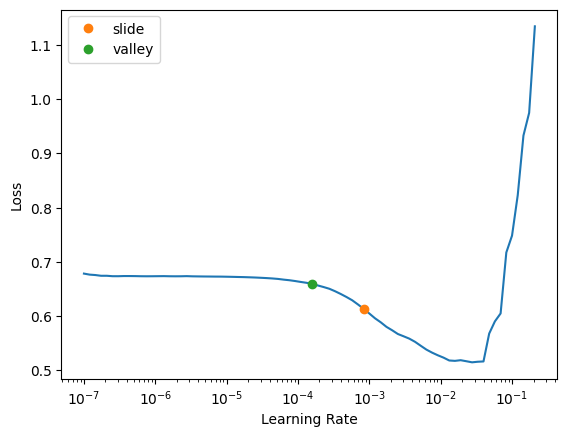

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(10,0.0004)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.264446,0.232503,0.874383,01:00
1,0.188850,0.185816,0.892873,01:01
2,0.173766,0.178591,0.907666,00:59
3,0.168012,0.176001,0.905767,00:59
4,0.165683,0.174265,0.909085,01:03
5,0.159905,0.172450,0.907926,01:01
6,0.158898,0.170908,0.908866,01:00
7,0.154802,0.170440,0.908946,01:00
8,0.152952,0.170347,0.908526,01:02
9,0.153028,0.170210,0.909405,01:00


In [ ]:
learner.save("movie_tvshow_classifier_0")

Path('models/movie_tvshow_classifier_0.pth')

In [ ]:
learner.export("models/movie_tvshow_classifier_0.pkl")

# Stage_1

In [ ]:
# learner.load("movie_tvshow_classifier_0")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0020892962347716093, valley=5.754399353463668e-06)

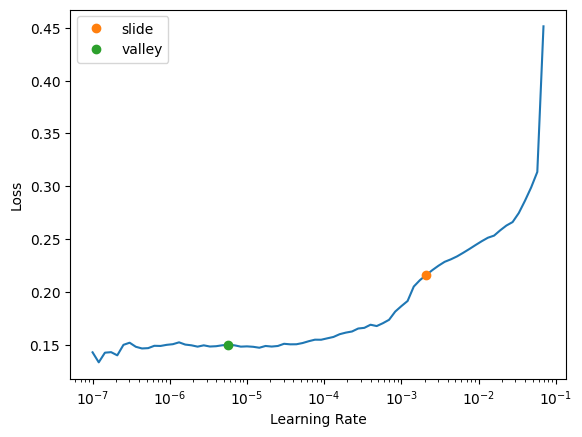

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(10,slice(4.75e-3, 2.25e-5))

epoch,train_loss,valid_loss,accuracy_multi,time


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.182400,0.186460,0.904888,01:44
1,0.311957,0.305356,0.873303,01:42
2,0.311091,0.305861,0.873303,01:43
3,0.305877,0.305152,0.873303,01:43
4,0.303405,0.305487,0.873303,01:43
5,0.306308,0.304553,0.873303,01:42
6,0.304183,0.304904,0.848656,01:42
7,0.305610,0.304555,0.848656,01:43
8,0.303739,0.304474,0.873303,01:42
9,0.302942,0.304323,0.873303,01:42


In [ ]:
# learner.save("movie_tvshow_genres_classifier_1")

In [ ]:
# learner.export("models/movie_tvshow_genres_classifier_1.pkl")